<a href="https://colab.research.google.com/github/Nipuna754/Time-Series-Analysis/blob/main/Time_Series_Analysis_using_Melbourne_weather_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

Loading the Dataset

In [ ]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv"
data = pd.read_csv(url)


Setting and Index by converting date column to datetime

In [3]:
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

Displaying Dataset

In [4]:
print("First five rows of the dataset:")
print(data.head())

First few rows of the dataset:
            Temp
Date            
1981-01-01  20.7
1981-01-02  17.9
1981-01-03  18.8
1981-01-04  14.6
1981-01-05  15.8


Plotting Data

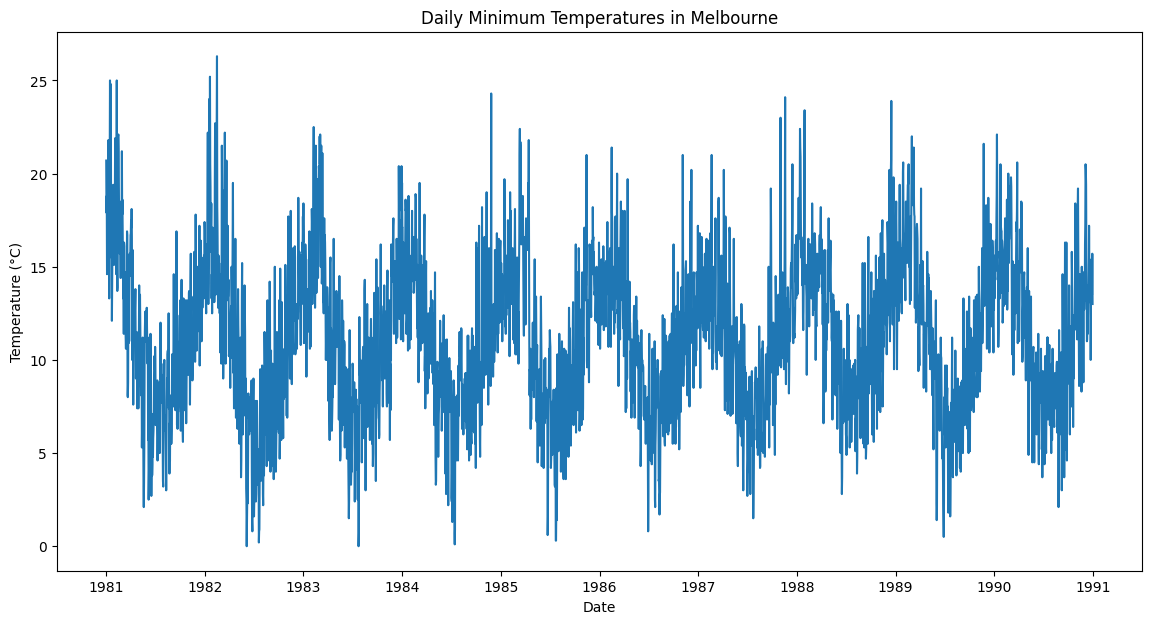

In [5]:
plt.figure(figsize=(14, 7))
plt.plot(data['Temp'])
plt.title('Daily Minimum Temperatures in Melbourne')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.show()


Plotting ACF and PACF

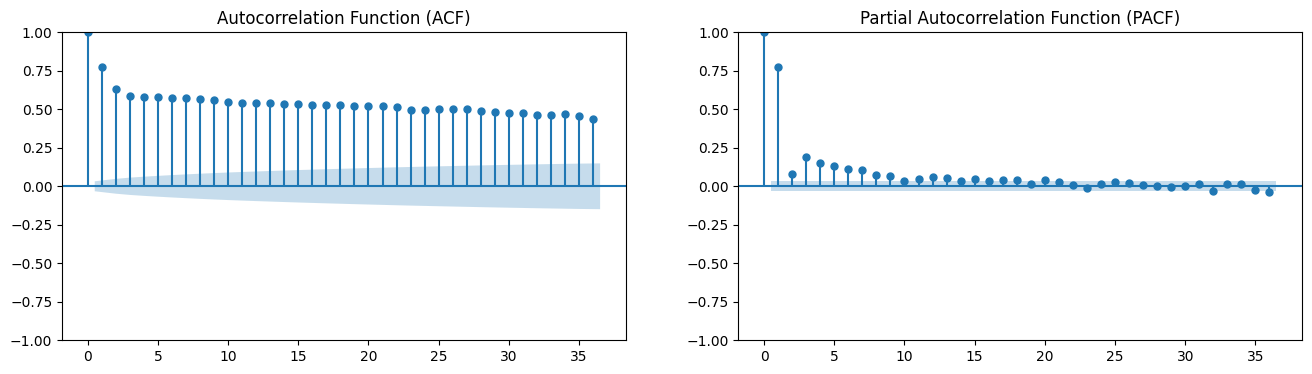

In [6]:

fig, axes = plt.subplots(1, 2, figsize=(16, 4))
plot_acf(data['Temp'], ax=axes[0])
axes[0].set_title('Autocorrelation Function (ACF)')
plot_pacf(data['Temp'], ax=axes[1])
axes[1].set_title('Partial Autocorrelation Function (PACF)')
plt.show()

Fit the ARIMA Model

In [7]:
model = ARIMA(data['Temp'], order=(1, 1, 1))
model_fit = model.fit()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Model Summary

In [8]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                   Temp   No. Observations:                 3650
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -8413.583
Date:                Mon, 11 Aug 2025   AIC                          16833.165
Time:                        10:55:52   BIC                          16851.772
Sample:                             0   HQIC                         16839.792
                               - 3650                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4630      0.017     26.538      0.000       0.429       0.497
ma.L1         -0.9204      0.008   -111.103      0.000      -0.937      -0.904
sigma2         5.8902      0.129     45.766      0.0

Forecasting

In [9]:
forecast = model_fit.forecast(steps=30)
forecast_dates = pd.date_range(data.index[-1] + pd.Timedelta(days=1), periods=30)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Plotting the forecast

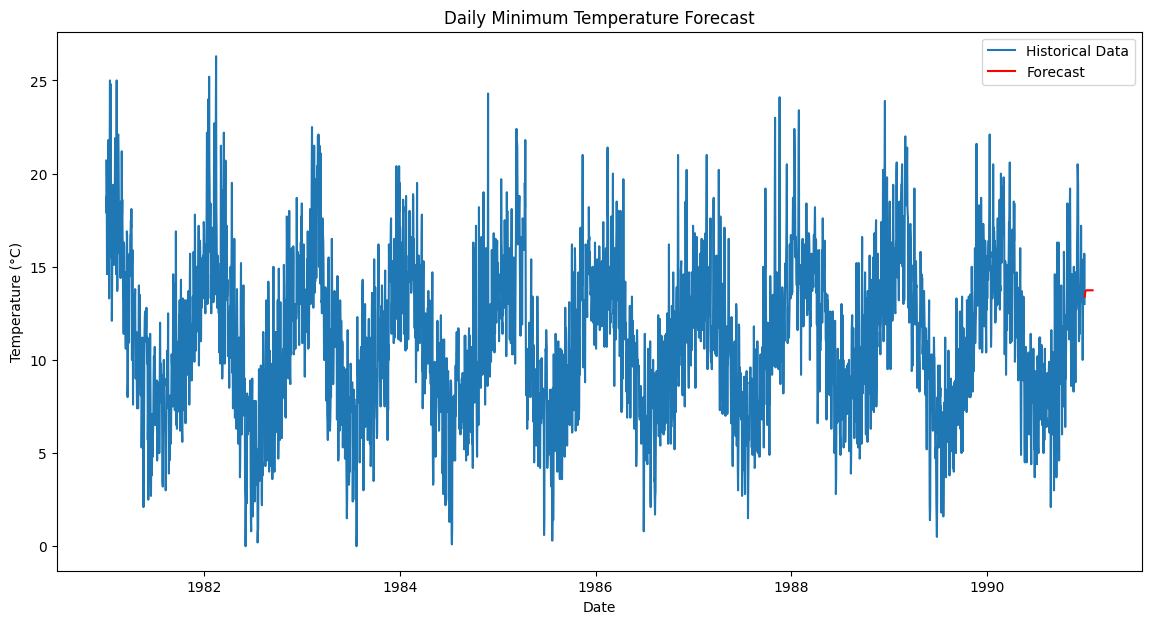

In [10]:
plt.figure(figsize=(14, 7))
plt.plot(data['Temp'], label='Historical Data')
plt.plot(forecast_dates, forecast, label='Forecast', color='red')
plt.title('Daily Minimum Temperature Forecast')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()